In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as ss

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor,kernels
from sklearn.model_selection import train_test_split, KFold,LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from src.models.constants import Constants
from src.models import util
from src.models.gaussian_process import featurize

In [5]:
#plt.style.available

In [6]:
plt.style.use('seaborn-talk')
cmap = plt.get_cmap("tab10")
raw_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/raw"
processed_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/processed"
n_map = {1:"Base",2:"Thru Rnd 1",3:"Thru Rnd 2",4:"Thru Rnd 3",5:"Thru Rnd 4",6:"Thru Rnd 5",7:"Thru Rnd 6-GP"}
seed=0

3-averaged_Thru-Rnd-4_Standardized_No-Tube-2.csv
Num Samples: 45, Num Features: 7
Range of y: 4.2 Mean of y: 3.16 SD of y: 1.25


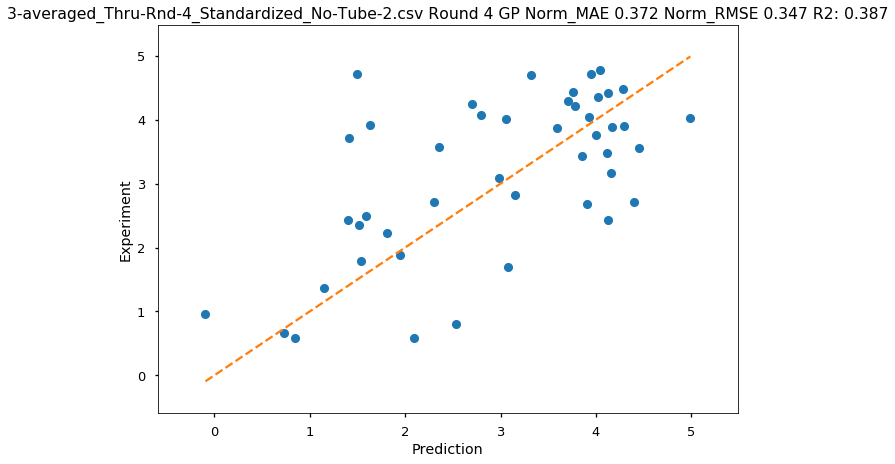

3-averaged_Round5-Standardized.csv
Num Samples: 50, Num Features: 7
Range of y: 4.26 Mean of y: 3.14 SD of y: 1.23


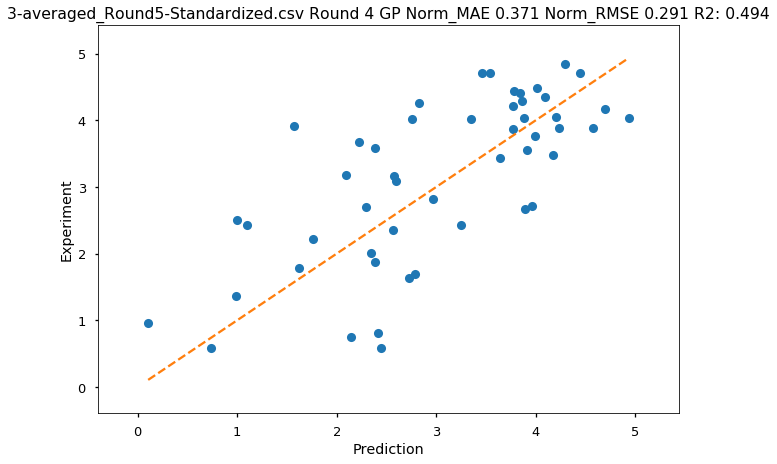

In [7]:
for fname in [f'3-averaged_Thru-Rnd-4_Standardized_No-Tube-2.csv', '3-averaged_Round5-Standardized.csv']:
    print(fname)
    f = processed_dir+"/"+fname
    df = pd.read_csv(f,index_col=0)
    X,y=util.get_Xy(df)
    print(f'Num Samples: {X.shape[0]}, Num Features: {X.shape[1]}')
    print(f'Range of y: {max(y)-min(y):.3} Mean of y: {y.mean():.3} SD of y: {y.std():.3}')
    n = X.shape[0]
    X = X.to_numpy()
    y = y.to_numpy()
    y_preds = []
    y_actuals = []
    loo = KFold(n_splits=n)
    for train_index,test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        pipeline = make_pipeline(GaussianProcessRegressor(kernel=1*kernels.RBF(length_scale=1.0,length_scale_bounds=(1e-2,1e2)),n_restarts_optimizer=5,random_state=seed))
        pipeline.fit(X_train,y_train)
        y_pred = pipeline.predict(X_test)
        y_preds.append(y_pred[0])
        y_actuals.append(y_test[0])
    pred = np.asarray(y_preds)
    expt = np.asarray(y_actuals)
    
    
    mae = np.mean(np.abs(pred-expt))
    slope, intercept, r_value, p_value, std_err = ss.linregress(expt,pred)
    r2 = r_value**2
    rmse = np.sqrt(mean_squared_error(expt,pred))
    mae_norm = np.mean(np.abs(pred-expt)/expt)
    rmse_norm = rmse / np.mean(expt)
    label=f'Round {4} GP Norm_MAE {mae_norm:.3} Norm_RMSE {rmse_norm:.3} R2: {r2:.3}'
    
    
    plt.plot(pred, expt, 'o')
    # plt.plot(y_preds,y_actuals,'o')
    plt.plot([min(pred),max(pred)],[min(pred),max(pred)],'--')
    plt.xlabel("Prediction")
    plt.ylabel("Experiment")
    plt.xlim((min(pred)-.5,max(pred)+.5))
    plt.ylim((min(pred)-.5,max(pred)+.5))
    plt.title(f'{fname} {label}')
    plt.show()


3-averaged_Thru-Rnd-6_Standardized_No-Tube-2.csv
Num Samples: 70, Num Features: 7
Range of y: 4.29 Mean of y: 3.49 SD of y: 1.17


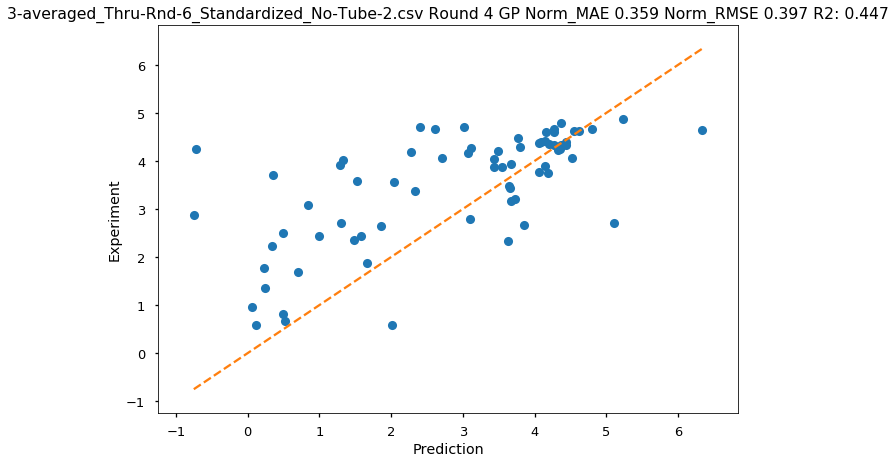

3-averaged_Thru-Rnd-6_Standardized_Yes-Tube-2.csv
Num Samples: 74, Num Features: 7
Range of y: 4.29 Mean of y: 3.46 SD of y: 1.15


C:\Users\Hermans_Desktop1\Anaconda3\envs\py36\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 6.27170455e-06, -1.80687520e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 41, 'nit': 9, 'warnflag': 2}
  " state: %s" % convergence_dict)


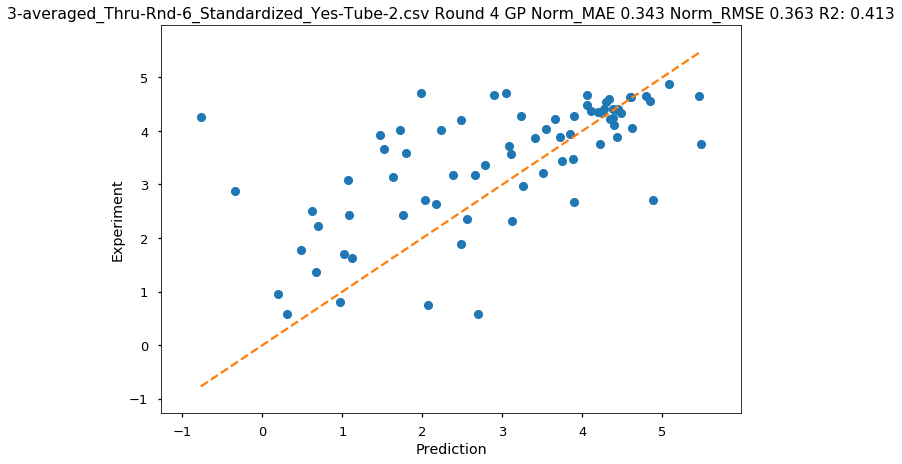

In [8]:
for fname in [f'3-averaged_Thru-Rnd-6_Standardized_No-Tube-2.csv', '3-averaged_Thru-Rnd-6_Standardized_Yes-Tube-2.csv']:
    print(fname)
    f = processed_dir+"/"+fname
    df = pd.read_csv(f,index_col=0)
    X,y=util.get_Xy(df)
    print(f'Num Samples: {X.shape[0]}, Num Features: {X.shape[1]}')
    print(f'Range of y: {max(y)-min(y):.3} Mean of y: {y.mean():.3} SD of y: {y.std():.3}')
    n = X.shape[0]
    X = X.to_numpy()
    y = y.to_numpy()
    y_preds = []
    y_actuals = []
    loo = KFold(n_splits=n)
    for train_index,test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        pipeline = make_pipeline(GaussianProcessRegressor(kernel=1*kernels.RBF(length_scale=1.0,length_scale_bounds=(1e-2,1e2)),n_restarts_optimizer=5,random_state=seed))
        pipeline.fit(X_train,y_train)
        y_pred = pipeline.predict(X_test)
        y_preds.append(y_pred[0])
        y_actuals.append(y_test[0])
    pred = np.asarray(y_preds)
    expt = np.asarray(y_actuals)

    
    
    mae = np.mean(np.abs(pred-expt))
    slope, intercept, r_value, p_value, std_err = ss.linregress(expt,pred)
    r2 = r_value**2
    rmse = np.sqrt(mean_squared_error(expt,pred))
    mae_norm = np.mean(np.abs(pred-expt)/expt)
    rmse_norm = rmse / np.mean(expt)
    label=f'Round {4} GP Norm_MAE {mae_norm:.3} Norm_RMSE {rmse_norm:.3} R2: {r2:.3}'
    
    
    plt.plot(pred, expt, 'o')
    # plt.plot(y_preds,y_actuals,'o')
    plt.plot([min(pred),max(pred)],[min(pred),max(pred)],'--')
    plt.xlabel("Prediction")
    plt.ylabel("Experiment")
    plt.xlim((min(pred)-.5,max(pred)+.5))
    plt.ylim((min(pred)-.5,max(pred)+.5))
    plt.title(f'{fname} {label}')
    plt.show()


In [18]:
resids = pred-expt
abs_resids = np.abs(resids)
percent_resids = resids / y_actuals
abs_percent_resids = 100*abs_resids / expt

for name,resid_list in zip(["Abs Residual","Abs % Residual"],[abs_resids,abs_percent_resids]):
    sort_indices = np.argsort(resid_list)
    for i in range(4):
        idx = sort_indices[i]
        print(f'Sn: {X[idx,0]} Ga: {X[idx,1]} Fe: {X[idx,2]} Cu: {X[idx,3]} Ca: {X[idx,4]} Pred: {y_preds[idx]:.3} Act: {y_actuals[idx]:.3} {name}: {resid_list[idx]:.3}')
    
    print('\n')
    for i in range(4):
        idx = sort_indices[-(i+1)]
        print(f'Sn: {X[idx,0]} Ga: {X[idx,1]} Fe: {X[idx,2]} Cu: {X[idx,3]} Ca: {X[idx,4]} Pred: {y_preds[idx]:.3} Act: {y_actuals[idx]:.3} {name}: {resid_list[idx]:.3}')
    

Sn: 3.0 Ga: 0.0 Fe: 1.0 Cu: 0.0 Ca: 2.5 Pred: 4.6 Act: 4.62 Abs Residual: 0.0254
Sn: 3.0 Ga: 0.0 Fe: 0.5 Cu: 0.0 Ca: 2.5 Pred: 4.6 Act: 4.63 Abs Residual: 0.029
Sn: 1.0 Ga: 0.0 Fe: 1.0 Cu: 0.0 Ca: 4.0 Pred: 4.38 Act: 4.41 Abs Residual: 0.03
Sn: 1.0 Ga: 0.0 Fe: 0.0 Cu: 1.0 Ca: 4.0 Pred: 4.43 Act: 4.4 Abs Residual: 0.0323


Sn: 8.0 Ga: 0.0 Fe: 0.0 Cu: 0.0 Ca: 0.0 Pred: -0.77 Act: 4.25 Abs Residual: 5.02
Sn: 8.0 Ga: 0.0 Fe: 1.0 Cu: 0.0 Ca: 1.0 Pred: -0.343 Act: 2.88 Abs Residual: 3.22
Sn: 4.0 Ga: 0.0 Fe: 0.0 Cu: 0.0 Ca: 0.0 Pred: 1.99 Act: 4.71 Abs Residual: 2.72
Sn: 0.0 Ga: 0.0 Fe: 0.0 Cu: 8.0 Ca: 0.0 Pred: 1.47 Act: 3.92 Abs Residual: 2.45
Sn: 3.0 Ga: 0.0 Fe: 1.0 Cu: 0.0 Ca: 2.5 Pred: 4.6 Act: 4.62 Abs % Residual: 0.549
Sn: 3.0 Ga: 0.0 Fe: 0.5 Cu: 0.0 Ca: 2.5 Pred: 4.6 Act: 4.63 Abs % Residual: 0.626
Sn: 1.0 Ga: 0.0 Fe: 1.0 Cu: 0.0 Ca: 4.0 Pred: 4.38 Act: 4.41 Abs % Residual: 0.681
Sn: 1.0 Ga: 0.0 Fe: 0.0 Cu: 1.0 Ca: 4.0 Pred: 4.43 Act: 4.4 Abs % Residual: 0.734


Sn: 0.0 Ga: 0.0 Fe: 0.

In [17]:
for name,resid_list in zip(["Abs Residual"],[abs_resids]):
    sort_indices = np.argsort(expt)
    for i in range(10):
        idx = sort_indices[-(i+1)]
        print(f'Sn: {X[idx,0]} Ga: {X[idx,1]} Fe: {X[idx,2]} Cu: {X[idx,3]} Ca: {X[idx,4]} Pred: {y_preds[idx]:.3} Act: {y_actuals[idx]:.3} {name}: {resid_list[idx]:.3}')
    

Sn: 2.5 Ga: 0.0 Fe: 0.5 Cu: 1.5 Ca: 3.0 Pred: 5.08 Act: 4.87 Abs Residual: 0.213
Sn: 4.0 Ga: 0.0 Fe: 0.0 Cu: 4.0 Ca: 0.0 Pred: 3.04 Act: 4.71 Abs Residual: 1.67
Sn: 4.0 Ga: 0.0 Fe: 0.0 Cu: 0.0 Ca: 0.0 Pred: 1.99 Act: 4.71 Abs Residual: 2.72
Sn: 3.0 Ga: 0.0 Fe: 0.0 Cu: 2.0 Ca: 3.5 Pred: 2.9 Act: 4.67 Abs Residual: 1.77
Sn: 4.0 Ga: 0.0 Fe: 1.0 Cu: 0.0 Ca: 4.0 Pred: 4.06 Act: 4.67 Abs Residual: 0.609
Sn: 3.0 Ga: 0.5 Fe: 0.5 Cu: 3.0 Ca: 3.5 Pred: 4.79 Act: 4.66 Abs Residual: 0.136
Sn: 4.0 Ga: 0.0 Fe: 0.0 Cu: 0.0 Ca: 4.0 Pred: 5.46 Act: 4.65 Abs Residual: 0.802
Sn: 3.0 Ga: 0.0 Fe: 0.5 Cu: 0.0 Ca: 2.5 Pred: 4.6 Act: 4.63 Abs Residual: 0.029
Sn: 3.0 Ga: 0.0 Fe: 1.0 Cu: 0.0 Ca: 2.5 Pred: 4.6 Act: 4.62 Abs Residual: 0.0254
Sn: 2.0 Ga: 0.0 Fe: 2.0 Cu: 0.0 Ca: 3.0 Pred: 4.33 Act: 4.6 Abs Residual: 0.267
